In [24]:
import numpy as np
import gensim
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import re
import statsmodels.formula.api
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib nbagg

ImportError: cannot import name LogisticRegression

In [7]:
def load_lexicon(filename):
    lexicon = []
    with open(filename) as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon("data/opinion_lexicon/positive-words.txt")
neg_words = load_lexicon("data/opinion_lexicon/negative-words.txt")

In [2]:
df = pd.read_csv("data/kaggle_toxicity/train.csv")

In [3]:
df[df["identity_hate"]==1][:10]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1
429,01166f26ee280e56,Gay \n\nThe existence of CDVF is further proof...,1,0,1,0,1,1
521,015d1b0bb4cc744d,Dictionaries\n\nHow dare you call my contribut...,1,0,1,0,1,1
887,026bd33490542b2e,"you gay motherfucker i know where you live,i a...",1,1,1,0,1,1
952,029dceed3519e371,you studid cock sucker u stop callin me ok its...,1,0,1,0,1,1
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1


<IPython.core.display.Javascript object>


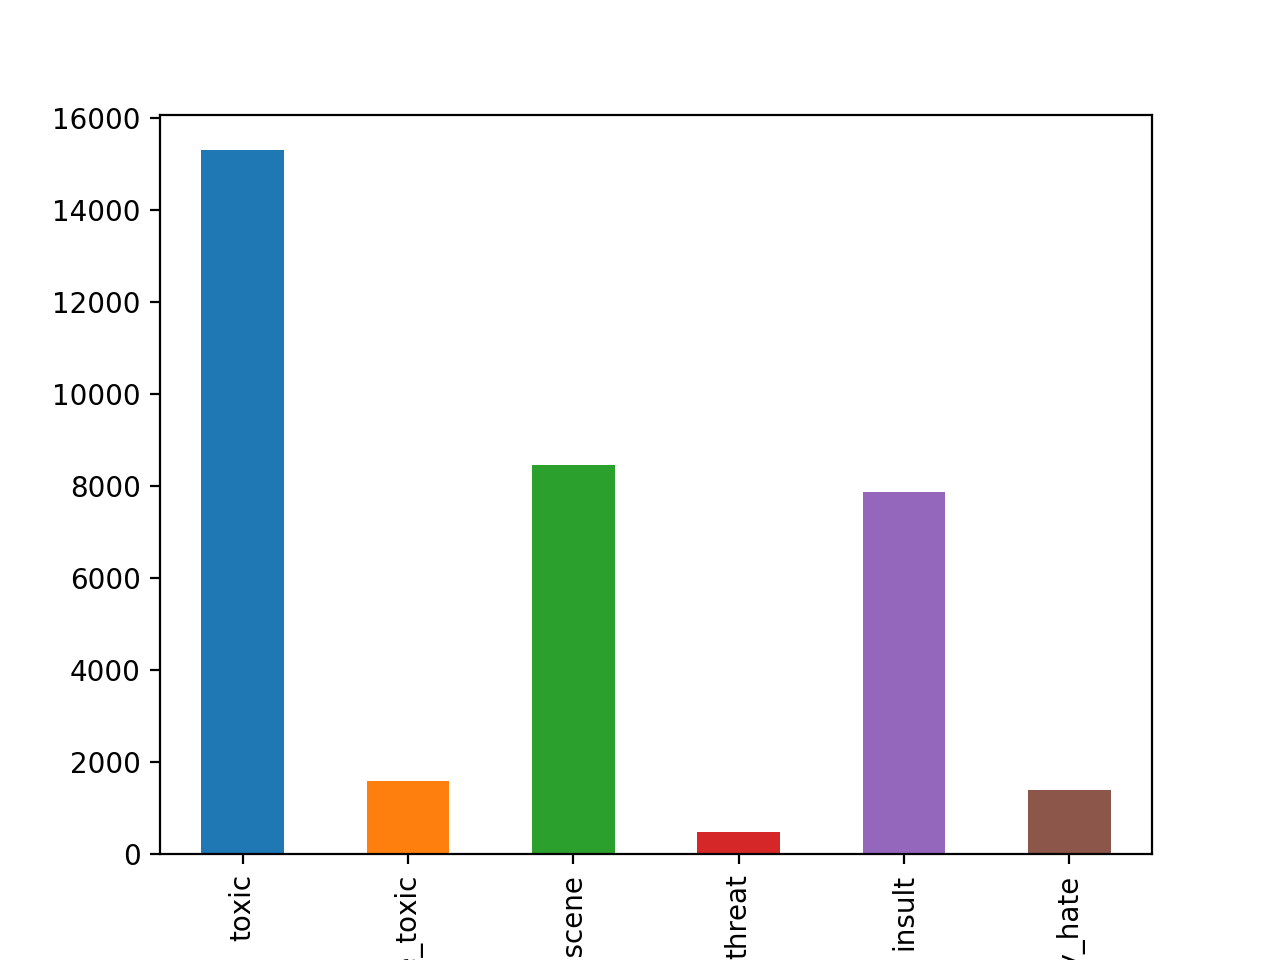

In [4]:
plt.figure()
df.sum(numeric_only=True).plot("bar")

In [73]:
a = df[df["toxic"]==1].comment_text.tolist()
from collections import Counter
import re

counts = Counter()
words = re.compile(r'\w+')

for sentence in a:
    counts.update(words.findall(sentence.lower()))

In [139]:
def name_toxicity_table_occurence():
    frames = []
    for group, name_list in sorted(NAMES_BY_ETHNICITY.items()):
        toxicities = [counts[name.lower()] for name in name_list]
        toxicity = pd.DataFrame({'toxicity': toxicities}, index=name_list)
        toxicity['group'] = group
        frames.append(toxicity)
    return pd.concat(frames)
name_occurence= name_toxicity_table_occurence()

In [147]:
name_occurence.sort_values(ascending=True,by="toxicity")

,toxicity,group
Yvette,0,Black
Melanie,0,White
Tawanda,0,Black
Shavonn,0,Black
Malika,0,Black
Lashandra,0,Black
Yolanda,0,Black
Tashika,0,Black
Sharise,0,Black
Latoya,0,Black


<IPython.core.display.Javascript object>


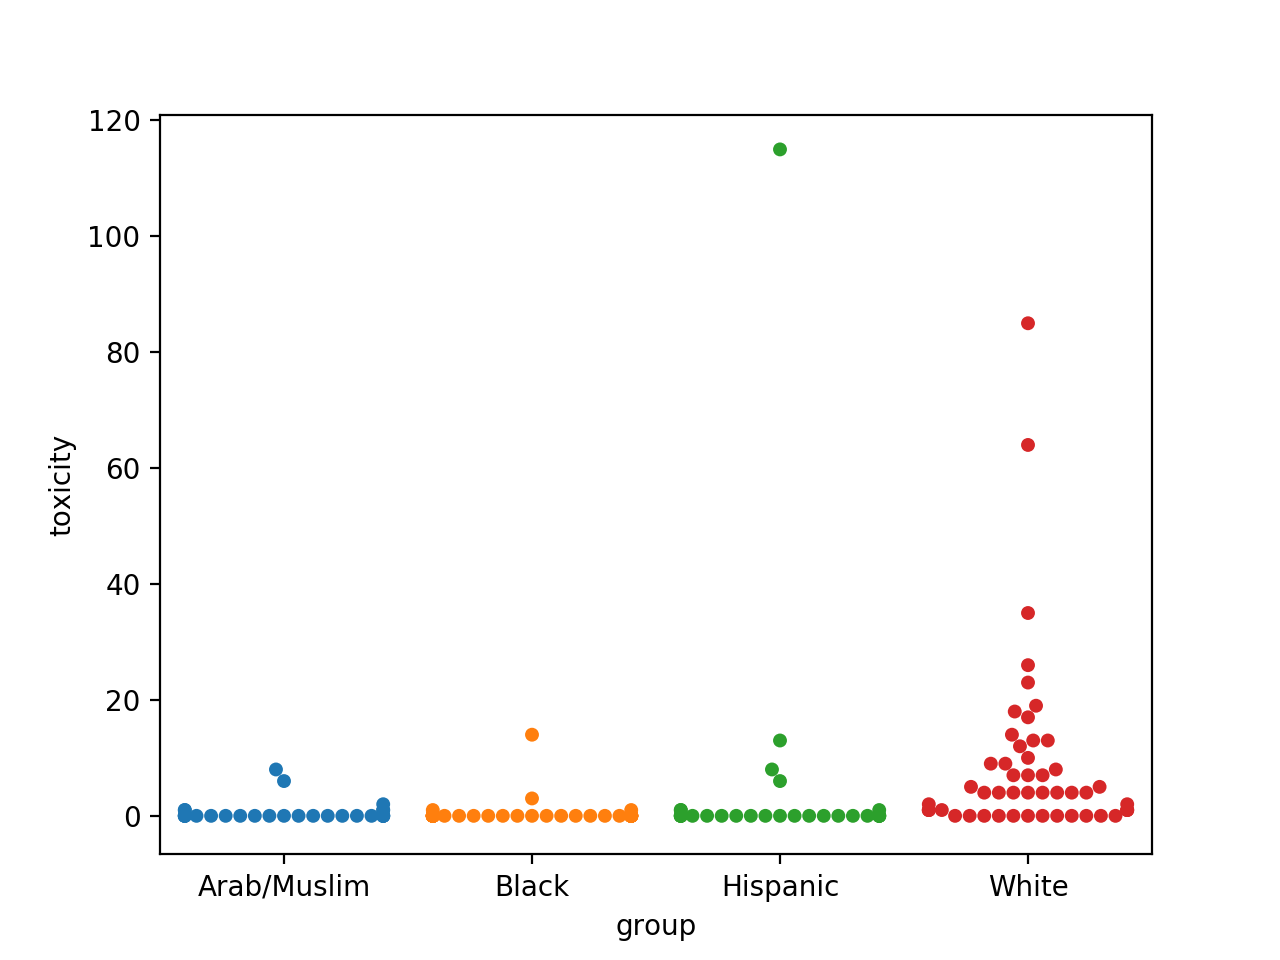

In [142]:
%matplotlib nbagg
plot = seaborn.swarmplot(x='group', y='toxicity', data=name_occurence)

In [ ]:
plt.figure()
a,b = zip(*counts.most_common(50))
index = np.arange(len(a))
plt.bar(index,b)
plt.xticks(index, a, fontsize=10, rotation=70)
plt.show()

<IPython.core.display.Javascript object>


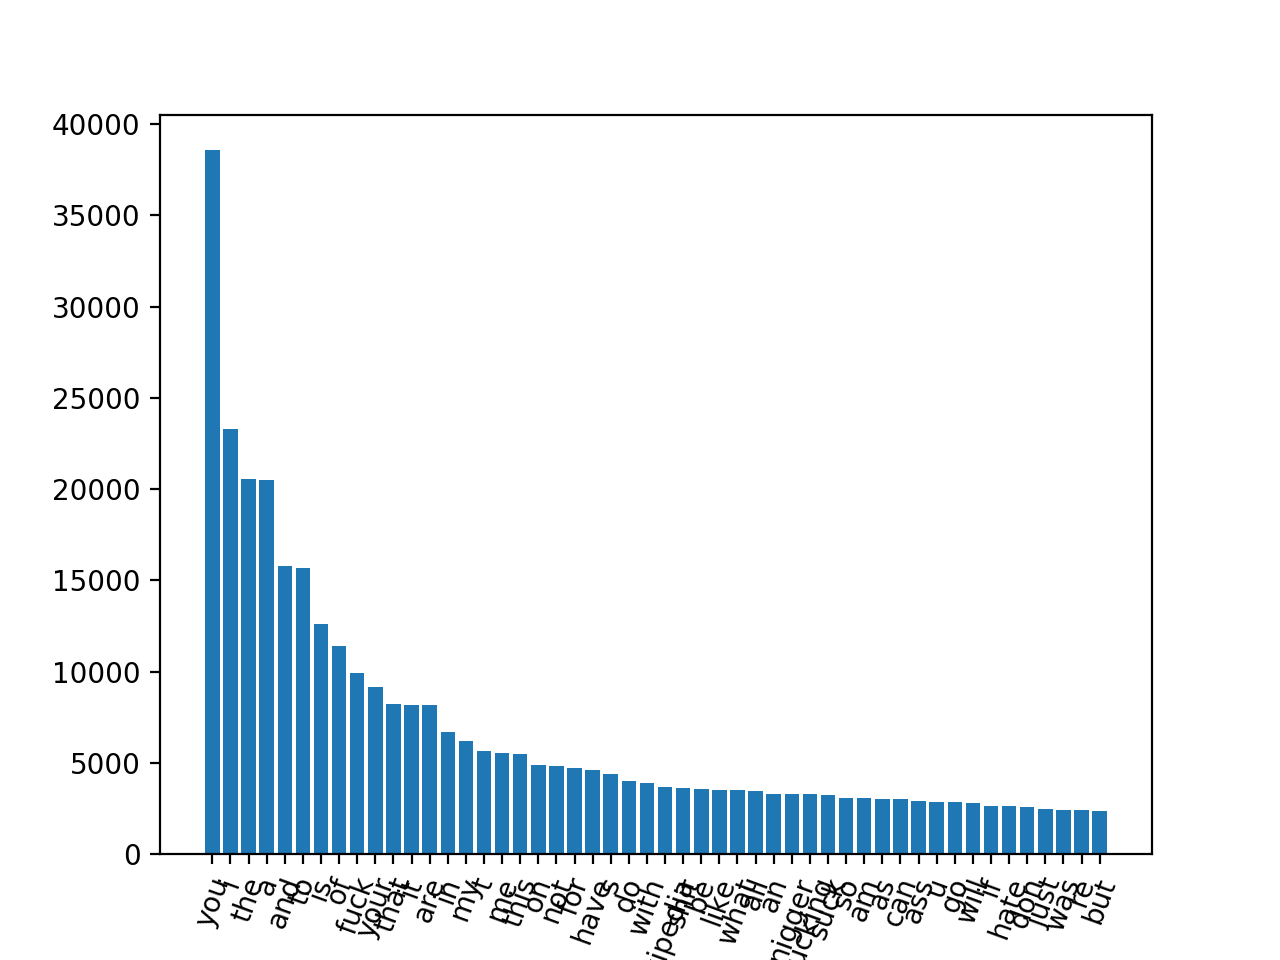

In [91]:
plt.figure()
a,b = zip(*counts.most_common(50))
index = np.arange(len(a))
plt.bar(index,b)
plt.xticks(index, a, fontsize=10, rotation=70)
plt.show()

In [106]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Lisa')

In [115]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
text = nltk.word_tokenize("HEATHER")
nltk.pos_tag(text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chrissweeney/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chrissweeney/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('HEATHER', 'NN')]

In [42]:
# embeddings = gensim.models.KeyedVectors.load_word2vec_format('data/embeddings/GoogleNews-vectors-negative300.bin.gz', binary=True)
# embeddings = gensim.models.KeyedVectors.load_word2vec_format('data/embeddings/2017_wiki_dump/model.txt')
embeddings = gensim.models.KeyedVectors.load_word2vec_format('data/glove.6B/glove.6B.300d.txt')

print "number of word vectors: ", len(embeddings.wv.vocab)

ValueError: invalid literal for int() with base 10: 'the'

In [15]:
def generate_train_test_set(model,targets,sentences,limit=1000,dim=300):
    vectors = np.zeros((29697,dim))
    labels = np.zeros((29697))
    count=0
    for i,sentence in enumerate(sentences):
        words = filter(lambda x: x in model,[x.lower() for x in sentence.split()])
        if len(words)>2:
            vectors[count,:] = np.mean(model[words],axis = 0)
            labels[count] = targets[i] 
            count+=1
    print count, " sentences in embeddings, ", limit - count, " sentences not in embeddings"
    return train_test_split(vectors, labels, test_size=0.1, random_state=0)

Race.
Color.
Religion or creed.
National origin or ancestry.
Sex.
Age.
Physical or mental disability.
Veteran status.
Genetic information.
Citizenship.

In [16]:
len(neg_words)

4444

In [15]:
pos_words = filter(lambda x:  x in embeddings,pos_words)
neg_words = filter(lambda x:  x in embeddings,neg_words)

In [22]:

pos_vectors = embeddings[pos_words]
neg_vectors = embeddings[neg_words]
vectors = np.concatenate([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors] + [-1 for entry in neg_vectors])
labels = list(pos_vectors) + list(neg_vectors)
train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

In [ ]:
toxic_sentences = df[df["toxic"]==1]["comment_text"]
num_toxic_samples = len(toxic_sentences)
non_toxic_sentences = df[df["toxic"]==0]["comment_text"].sample(num_toxic_samples)
sentences = pd.concat([toxic_sentences, non_toxic_sentences])
targets  = np.zeros(num_toxic_samples*2)
targets[num_toxic_samples:] = 1
train_vectors, test_vectors, train_targets, test_targets = generate_train_test_set(embeddings,targets,sentences,limit=num_toxic_samples*2 ,dim=300)

In [20]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        def calculate_gradient(self, X, Y, beta):

        if type(Y) is np.ndarray:
            data_num = len(Y)
            original_X = X[:, 1:]
            K = utility.Kernel.kernel_matrix(self, original_X)
        else:
            data_num = 1
            original_x = X[1:]
            original_X = self.train_X[:, 1:]
            K = utility.Kernel.kernel_matrix_xX(self, original_x, original_X)

        gradient_average = ((2 * self.lambda_p) / data_num) * np.dot(beta, K) + 
        np.dot(self.theta((-1) * Y * np.dot(beta, K)) * ((-1) * Y), K) / data_num
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print 'loss: {self.__loss(h, y)} \t'
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [23]:
model = LogisticRegression(lr=0.1, num_iter=3000,verbose=True)
%time model.fit(train_vectors, train_targets)

NameError: name 'LogisticRegression' is not defined

In [28]:
preds = model.predict(test_vectors,.5)
# accuracy
(preds == test_targets).mean()

0.80909090909090908

In [114]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid', gamma=2,probability=True)
clf.fit(train_vectors, train_targets)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
preds = clf.predict(test_vectors)
# accuracy
(preds == test_targets).mean()

0.75435816164817748

In [116]:
def words_to_toxicity(model,embeddings,words):
    words = filter(lambda x: x in embeddings,[x.lower() for x in words])
    if len(words)>0:
        vector = np.mean(embeddings[words],axis = 0)
        prob = model.predict_proba([vector])
        return prob[0][0]
    else: return 0;

In [117]:
def text_to_toxicity(model,embeddings,text):
    tokens = text.split()
    toxicity = words_to_toxicity(model,embeddings,tokens)
    return toxicity

In [118]:
text_to_toxicity(clf,embeddings,"nice mam")

0.59182807481239197

In [34]:
NAMES_BY_ETHNICITY = {
    'White': [
        'Adam', 'Chip', 'Harry', 'Josh', 'Roger', 'Alan', 'Frank', 'Ian', 'Justin',
        'Ryan', 'Andrew', 'Fred', 'Jack', 'Matthew', 'Stephen', 'Brad', 'Greg', 'Jed',
        'Paul', 'Todd', 'Brandon', 'Hank', 'Jonathan', 'Peter', 'Wilbur', 'Amanda',
        'Courtney', 'Heather', 'Melanie', 'Sara', 'Amber', 'Crystal', 'Katie',
        'Meredith', 'Shannon', 'Betsy', 'Donna', 'Kristin', 'Nancy', 'Stephanie',
        'Bobbie-Sue', 'Ellen', 'Lauren', 'Peggy', 'Sue-Ellen', 'Colleen', 'Emily',
        'Megan', 'Rachel', 'Wendy'
    ],

    'Black': [
        'Alonzo', 'Jamel', 'Lerone', 'Percell', 'Theo', 'Alphonse', 'Jerome',
        'Leroy', 'Rasaan', 'Torrance', 'Darnell', 'Lamar', 'Lionel', 'Rashaun',
        'Tyree', 'Deion', 'Lamont', 'Malik', 'Terrence', 'Tyrone', 'Everol',
        'Lavon', 'Marcellus', 'Terryl', 'Wardell', 'Aiesha', 'Lashelle', 'Nichelle',
        'Shereen', 'Temeka', 'Ebony', 'Latisha', 'Shaniqua', 'Tameisha', 'Teretha',
        'Jasmine', 'Latonya', 'Shanise', 'Tanisha', 'Tia', 'Lakisha', 'Latoya',
        'Sharise', 'Tashika', 'Yolanda', 'Lashandra', 'Malika', 'Shavonn',
        'Tawanda', 'Yvette'
    ],
    
    'Hispanic': [
        'Juan', 'José', 'Miguel', 'Luís', 'Jorge', 'Santiago', 'Matías', 'Sebastián',
        'Mateo', 'Nicolás', 'Alejandro', 'Samuel', 'Diego', 'Daniel', 'Tomás',
        'Juana', 'Ana', 'Luisa', 'María', 'Elena', 'Sofía', 'Isabella', 'Valentina',
        'Camila', 'Valeria', 'Ximena', 'Luciana', 'Mariana', 'Victoria', 'Martina'
    ],
    

    'Arab/Muslim': [
        'Mohammed', 'Omar', 'Ahmed', 'Ali', 'Youssef', 'Abdullah', 'Yasin', 'Hamza',
        'Ayaan', 'Syed', 'Rishaan', 'Samar', 'Ahmad', 'Zikri', 'Rayyan', 'Mariam',
        'Jana', 'Malak', 'Salma', 'Nour', 'Lian', 'Fatima', 'Ayesha', 'Zahra', 'Sana',
        'Zara', 'Alya', 'Shaista', 'Zoya', 'Yasmin'
    ]
}

In [122]:
identities = ['lesbian', 'gay', 'bisexual', 'transgender', 'trans', 'queer', 'lgbt', 'lgbtq', 'homosexual', 'straight', 'heterosexual', 'male', 'female', 'nonbinary', 'african', 'african american', 'black', 'white', 'european', 'hispanic', 'latino', 'latina', 'latinx', 'mexican', 'canadian', 'american', 'asian', 'indian', 'middle eastern', 'chinese', 'japanese', 'christian', 'muslim', 'jewish', 'buddhist', 'catholic', 'protestant', 'sikh', 'taoist', 'old', 'older', 'young', 'younger', 'teenage', 'millenial', 'middle aged', 'elderly', 'blind', 'deaf', 'paralyzed']

In [124]:
pd.Series(identities)

0              lesbian
1                  gay
2             bisexual
3          transgender
4                trans
5                queer
6                 lgbt
7                lgbtq
8           homosexual
9             straight
10        heterosexual
11                male
12              female
13           nonbinary
14             african
15    african american
16               black
17               white
18            european
19            hispanic
20              latino
21              latina
22              latinx
23             mexican
24            canadian
25            american
26               asian
27              indian
28      middle eastern
29             chinese
30            japanese
31           christian
32              muslim
33              jewish
34            buddhist
35            catholic
36          protestant
37                sikh
38              taoist
39                 old
40               older
41               young
42             younger
43         

In [119]:
def identity_toxicity_table():
    words = []
    toxicities = []
    for word in sorted(identities):
        if word in embeddings:
            toxicities.append(text_to_toxicity(clf, embeddings,word.lower()))
            words.append(word)
    toxicities, words = zip(*sorted(zip(toxicities, words),key=lambda x : x[0]))
    return toxicities, words

identity_toxicity = identity_toxicity_table()

In [120]:
np.var(identity_toxicity[0])

0.031044461343461529

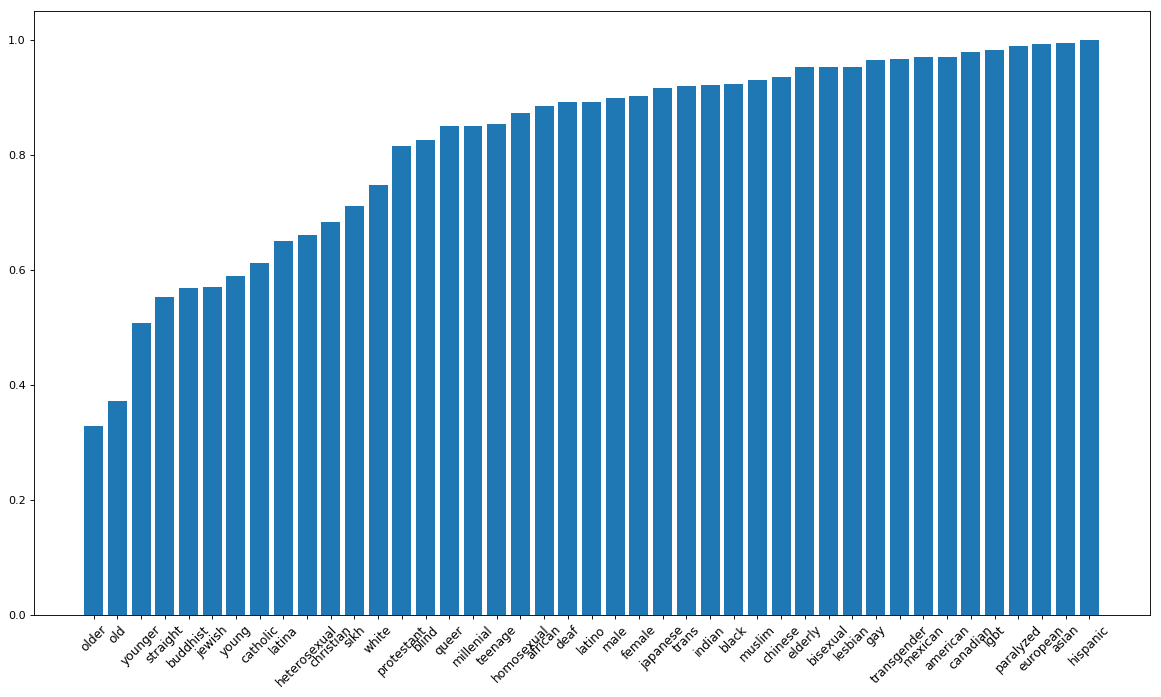

In [121]:
%matplotlib inline
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
index = np.arange(len(identity_toxicity[1]))
plt.bar(index,identity_toxicity[0])
plt.xticks(index, identity_toxicity[1], fontsize=11, rotation=45)
plt.show()

In [53]:
def name_toxicity_table():
    frames = []
    for group, name_list in sorted(WORDS_BY_ETHNICITY.items()):
        toxicities = [text_to_toxicity(clf, embeddings,name.lower()) for name in name_list if name in embeddings]
        print len(name_list),1
        name_list = filter(lambda x: x in embeddings,name_list)
        print len(name_list)

        toxicity = pd.DataFrame({'toxicity': toxicities}, index=name_list)
        toxicity['group'] = group
        frames.append(toxicity)
    return pd.concat(frames)

name_toxicity = name_toxicity_table()

5 1
5
5 1
4
5 1
5
5 1
5


In [55]:
name_toxicity

,toxicity,group
Arab,0.983865,Arab/Muslim
Muslim,0.994675,Arab/Muslim
Iraq,0.943173,Arab/Muslim
Turban,0.996360,Arab/Muslim
Alah,0.000000,Arab/Muslim
Black,0.991779,Black
Africa,0.918742,Black
Negro,0.997503,Black
Baptist,0.849828,Black
Mexico,0.280140,Hispanic


In [92]:
text_to_toxicity(clf, embeddings, "canadian")

0.70350316993485884

In [97]:
text_to_toxicity(clf, embeddings, "nice")

3.0000008999999801e-14

In [94]:
text_to_toxicity(clf, embeddings, "white")

0.70359438361668725

In [39]:
words_to_toxicity(clf, embeddings,"lets get italian food")

0.75524914346986027

In [40]:
words_to_toxicity(clf, embeddings,"lets get american food")

0.74739403360152556

<IPython.core.display.Javascript object>


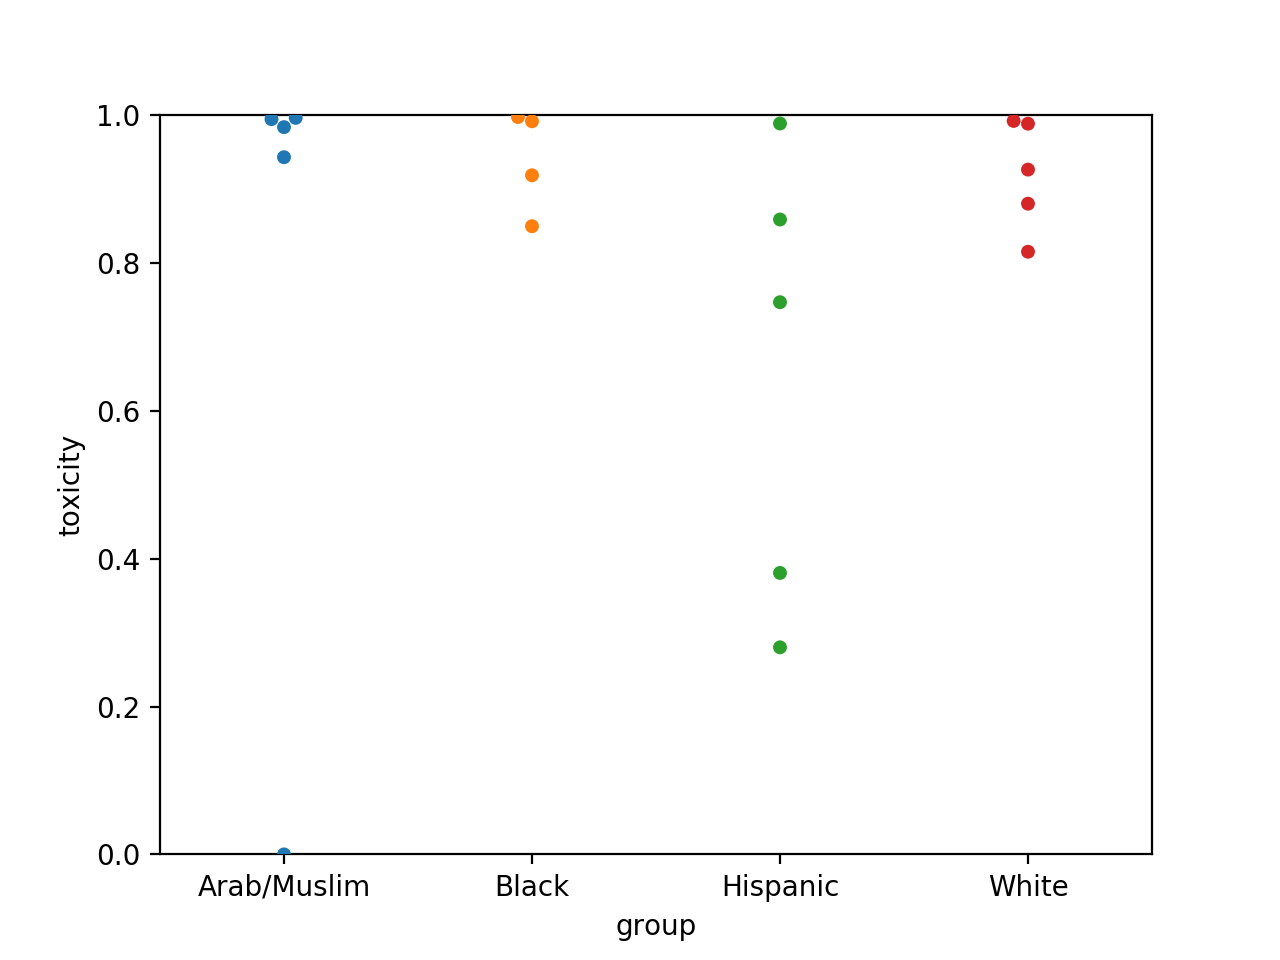

(0, 1)

In [56]:
%matplotlib nbagg
plot = seaborn.swarmplot(x='group', y='toxicity', data=name_toxicity)
plot.set_ylim([0, 1])

In [52]:
WORDS_BY_ETHNICITY = {
    'White': [
        'Catholic','Protestant','America','Caucasian','White'
    ],

    'Black': [
        'African American','Black','Africa','Negro','Baptist'
    ],
    
    'Hispanic': [
        'Mexico', 'Mexican','Tacos','Border','Hispanic'
    ],
    

    'Arab/Muslim': [
        'Arab','Muslim','Iraq','Turban','Alah'
    ]
}